# Melody Peterson  

# WW Data Scientist (Food Data) Homework

The FNDDS Nutrient values.xlsx file from the USDA (U.S. Department of Agriculture) contains
the complete nutritional information from more than 7000 foods.  
(If you should need it, the background to the FNDDS study is [here](https://www.ars.usda.gov/northeast-area/beltsville-md-bhnrc/beltsville-human-nutrition-research-center/food-surveys-research-group/docs/fndds-download-databases/) but for the modeling exercise
below, the data file is self-contained.)  

1. Predict Total Sugar  
a) Build a model from these data to predict the total sugar content / 100g ---that is, the
target variable is in column H---from the other candidate dependent variable columns
A--BQ. 
We are not looking for a perfect model. We are more interested in how you structure the
problem, any exploratory data analysis you might perform, how you select features, and
especially how you evaluate the model’s performance.  
b) Write a few sentences to explain what assumptions you would be making if applying a
model from a US nutrition dataset to the Brazilian market and, given what you know
above, how might you (in)validate those assumptions?  

2. Rank Fruit Sweetness  
Rank the basic fruit groups (cherries, bananas, apple, oranges etc) by their sweetness meaning
total sugar / 100g, Col H. 
You might find the following useful
https://www.ars.usda.gov/ARSUserFiles/80400530/pdf/1718/Food_Category_List.pdf

## Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("2017-2018 FNDDS At A Glance - FNDDS Nutrient Values.xlsx", sheet_name = "FNDDS Nutrient Values",
                  header = 1, index_col = 0)

In [3]:
df.head()

,Main food description,WWEIA Category number,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),"Fatty acids, total saturated (g)",...,20:1\n(g),22:1\n(g),18:2\n(g),18:3\n(g),18:4\n(g),20:4\n(g),20:5 n-3\n(g),22:5 n-3\n(g),22:6 n-3\n(g),Water\n(g)
Food code,,,,,,,,,,,,,,,,,,,,,
11000000,"Milk, human",9602,Human milk,70,1.03,6.89,6.89,0.0,4.38,2.009,...,0.040,0.0,0.374,0.052,0.0,0.026,0.000,0.000,0.0,87.50
11100000,"Milk, NFS",1004,"Milk, reduced fat",51,3.34,4.87,4.89,0.0,1.99,1.164,...,0.002,0.0,0.069,0.007,0.0,0.003,0.000,0.001,0.0,89.04
11111000,"Milk, whole",1002,"Milk, whole",60,3.28,4.67,4.81,0.0,3.20,1.860,...,0.004,0.0,0.115,0.012,0.0,0.004,0.001,0.002,0.0,88.10
11111100,"Milk, low sodium, whole",1002,"Milk, whole",61,3.10,4.46,4.46,0.0,3.46,2.154,...,0.000,0.0,0.078,0.050,0.0,0.000,0.000,0.000,0.0,88.20
11111150,"Milk, calcium fortified, whole",1002,"Milk, whole",60,3.28,4.67,4.81,0.0,3.20,1.860,...,0.004,0.0,0.115,0.012,0.0,0.004,0.001,0.002,0.0,88.10


In [4]:
# Remove returns, spaces, and invalid characters from column names
df.index.name = 'Food_code'
for i in [", ", " ", "\n", "-", ":"]:
    df.columns = df.columns.str.replace(i, "_")
df.columns = df.columns.str.replace('(','') 
df.columns = df.columns.str.replace(')','')
df.head()

,Main_food_description,WWEIA_Category_number,WWEIA_Category_description,Energy_kcal,Protein_g,Carbohydrate_g,Sugars_total_g,Fiber_total_dietary_g,Total_Fat_g,Fatty_acids_total_saturated_g,...,20_1_g,22_1_g,18_2_g,18_3_g,18_4_g,20_4_g,20_5_n_3_g,22_5_n_3_g,22_6_n_3_g,Water_g
Food_code,,,,,,,,,,,,,,,,,,,,,
11000000,"Milk, human",9602,Human milk,70,1.03,6.89,6.89,0.0,4.38,2.009,...,0.040,0.0,0.374,0.052,0.0,0.026,0.000,0.000,0.0,87.50
11100000,"Milk, NFS",1004,"Milk, reduced fat",51,3.34,4.87,4.89,0.0,1.99,1.164,...,0.002,0.0,0.069,0.007,0.0,0.003,0.000,0.001,0.0,89.04
11111000,"Milk, whole",1002,"Milk, whole",60,3.28,4.67,4.81,0.0,3.20,1.860,...,0.004,0.0,0.115,0.012,0.0,0.004,0.001,0.002,0.0,88.10
11111100,"Milk, low sodium, whole",1002,"Milk, whole",61,3.10,4.46,4.46,0.0,3.46,2.154,...,0.000,0.0,0.078,0.050,0.0,0.000,0.000,0.000,0.0,88.20
11111150,"Milk, calcium fortified, whole",1002,"Milk, whole",60,3.28,4.67,4.81,0.0,3.20,1.860,...,0.004,0.0,0.115,0.012,0.0,0.004,0.001,0.002,0.0,88.10


In [5]:
df.columns

Index(['Main_food_description', 'WWEIA_Category_number',
       'WWEIA_Category_description', 'Energy_kcal', 'Protein_g',
       'Carbohydrate_g', 'Sugars_total_g', 'Fiber_total_dietary_g',
       'Total_Fat_g', 'Fatty_acids_total_saturated_g',
       'Fatty_acids_total_monounsaturated_g',
       'Fatty_acids_total_polyunsaturated_g', 'Cholesterol_mg', 'Retinol_mcg',
       'Vitamin_A_RAE_mcg_RAE', 'Carotene_alpha_mcg', 'Carotene_beta_mcg',
       'Cryptoxanthin_beta_mcg', 'Lycopene_mcg', 'Lutein_+_zeaxanthin_mcg',
       'Thiamin_mg', 'Riboflavin_mg', 'Niacin_mg', 'Vitamin_B_6_mg',
       'Folic_acid_mcg', 'Folate_food_mcg', 'Folate_DFE_mcg_DFE',
       'Folate_total_mcg', 'Choline_total_mg', 'Vitamin_B_12_mcg',
       'Vitamin_B_12_added_mcg', 'Vitamin_C_mg', 'Vitamin_D_D2_+_D3_mcg',
       'Vitamin_E_alpha_tocopherol_mg', 'Vitamin_E_added_mg',
       'Vitamin_K_phylloquinone_mcg', 'Calcium_mg', 'Phosphorus_mg',
       'Magnesium_mg', 'Iron_mg', 'Zinc_mg', 'Copper_mg', 'Selenium_mcg'

In [6]:
df.describe()

,WWEIA_Category_number,Energy_kcal,Protein_g,Carbohydrate_g,Sugars_total_g,Fiber_total_dietary_g,Total_Fat_g,Fatty_acids_total_saturated_g,Fatty_acids_total_monounsaturated_g,Fatty_acids_total_polyunsaturated_g,...,20_1_g,22_1_g,18_2_g,18_3_g,18_4_g,20_4_g,20_5_n_3_g,22_5_n_3_g,22_6_n_3_g,Water_g
count,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,...,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000
mean,4698.965975,197.121559,8.599085,20.828039,7.336660,1.703840,8.958187,2.795032,3.217548,2.173808,...,0.040383,0.010167,1.897950,0.200369,0.002518,0.019184,0.013539,0.004915,0.023334,59.798820
std,2212.828607,140.705036,8.296889,21.887363,12.795577,2.558168,11.049585,4.102655,4.632640,3.899902,...,0.136010,0.113656,3.509074,0.834606,0.018688,0.039292,0.079486,0.019230,0.120919,26.828203
min,1002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3002.000000,85.000000,2.220000,5.650000,0.780000,0.100000,2.060000,0.503000,0.513000,0.338000,...,0.000000,0.000000,0.228500,0.028000,0.000000,0.000000,0.000000,0.000000,0.000000,45.895000
50%,3802.000000,166.000000,6.190000,13.300000,2.390000,1.000000,5.480000,1.444000,1.869000,1.036000,...,0.011000,0.000000,0.871000,0.089000,0.000000,0.003000,0.000000,0.000000,0.000000,66.590000
75%,6411.500000,274.000000,12.130000,26.195000,7.380000,2.100000,12.650000,3.668500,4.433000,2.625000,...,0.036000,0.000000,2.274000,0.211000,0.000000,0.020000,0.001000,0.002000,0.002000,80.605000
max,9999.000000,902.000000,78.130000,100.000000,99.800000,46.200000,100.000000,82.500000,75.221000,67.849000,...,4.674000,5.166000,65.700000,53.368000,0.664000,0.505000,2.741000,0.380000,3.800000,99.980000


In [7]:
X = df.drop(columns=['Main_food_description','WWEIA_Category_number','WWEIA_Category_description', 'Sugars_total_g'])
y = df['Sugars_total_g']

In [8]:
X.head()

,Energy_kcal,Protein_g,Carbohydrate_g,Fiber_total_dietary_g,Total_Fat_g,Fatty_acids_total_saturated_g,Fatty_acids_total_monounsaturated_g,Fatty_acids_total_polyunsaturated_g,Cholesterol_mg,Retinol_mcg,...,20_1_g,22_1_g,18_2_g,18_3_g,18_4_g,20_4_g,20_5_n_3_g,22_5_n_3_g,22_6_n_3_g,Water_g
Food_code,,,,,,,,,,,,,,,,,,,,,
11000000,70,1.03,6.89,0.0,4.38,2.009,1.658,0.497,14,60,...,0.040,0.0,0.374,0.052,0.0,0.026,0.000,0.000,0.0,87.50
11100000,51,3.34,4.87,0.0,1.99,1.164,0.426,0.065,8,58,...,0.002,0.0,0.069,0.007,0.0,0.003,0.000,0.001,0.0,89.04
11111000,60,3.28,4.67,0.0,3.20,1.860,0.688,0.108,12,31,...,0.004,0.0,0.115,0.012,0.0,0.004,0.001,0.002,0.0,88.10
11111100,61,3.10,4.46,0.0,3.46,2.154,0.999,0.128,14,28,...,0.000,0.0,0.078,0.050,0.0,0.000,0.000,0.000,0.0,88.20
11111150,60,3.28,4.67,0.0,3.20,1.860,0.688,0.108,12,31,...,0.004,0.0,0.115,0.012,0.0,0.004,0.001,0.002,0.0,88.10


## Exploratory Data Analysis

### Basic graphs

(array([5705.,  623.,  288.,  191.,  119.,   64.,   45.,   23.,   14.,
          11.]),
 array([ 0.  ,  9.98, 19.96, 29.94, 39.92, 49.9 , 59.88, 69.86, 79.84,
        89.82, 99.8 ]),
 <BarContainer object of 10 artists>)

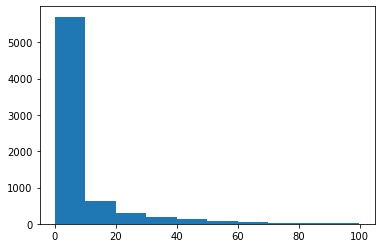

In [223]:
plt.hist(y)

In [224]:
y.value_counts()

0.00     663
0.04     113
0.88      68
1.10      60
1.15      35
        ... 
14.97      1
26.71      1
18.79      1
28.44      1
4.49       1
Name: Sugars_total_g, Length: 1788, dtype: int64

In [227]:
def remove_outliers(df, column_name):
    q1 = df[column_name].describe()['25%']
    q3 = df[column_name].describe()['75%']
    iqr = q3 - q1
    return df.loc[(df[column_name]>=(q1-(1.5*iqr))) & (df[column_name]<=(q3+(1.5*iqr)))]

In [232]:
df['Sugars_total_g']

Food_code
11000000     6.89
11100000     4.89
11111000     4.81
11111100     4.46
11111150     4.81
            ...  
99997802     3.42
99997804     2.73
99997810     3.25
99998130    13.08
99998210     0.00
Name: Sugars_total_g, Length: 7083, dtype: float64

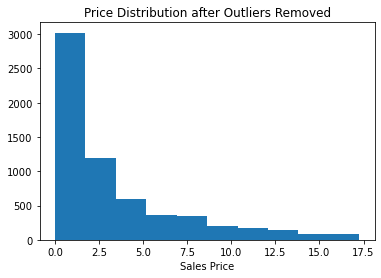

In [233]:
plt.hist(remove_outliers(df, "Sugars_total_g")["Sugars_total_g"])
plt.title("Price Distribution after Outliers Removed")
plt.xlabel('Sales Price');

In [226]:
y_log = ln(y)

NameError: name 'ln' is not defined

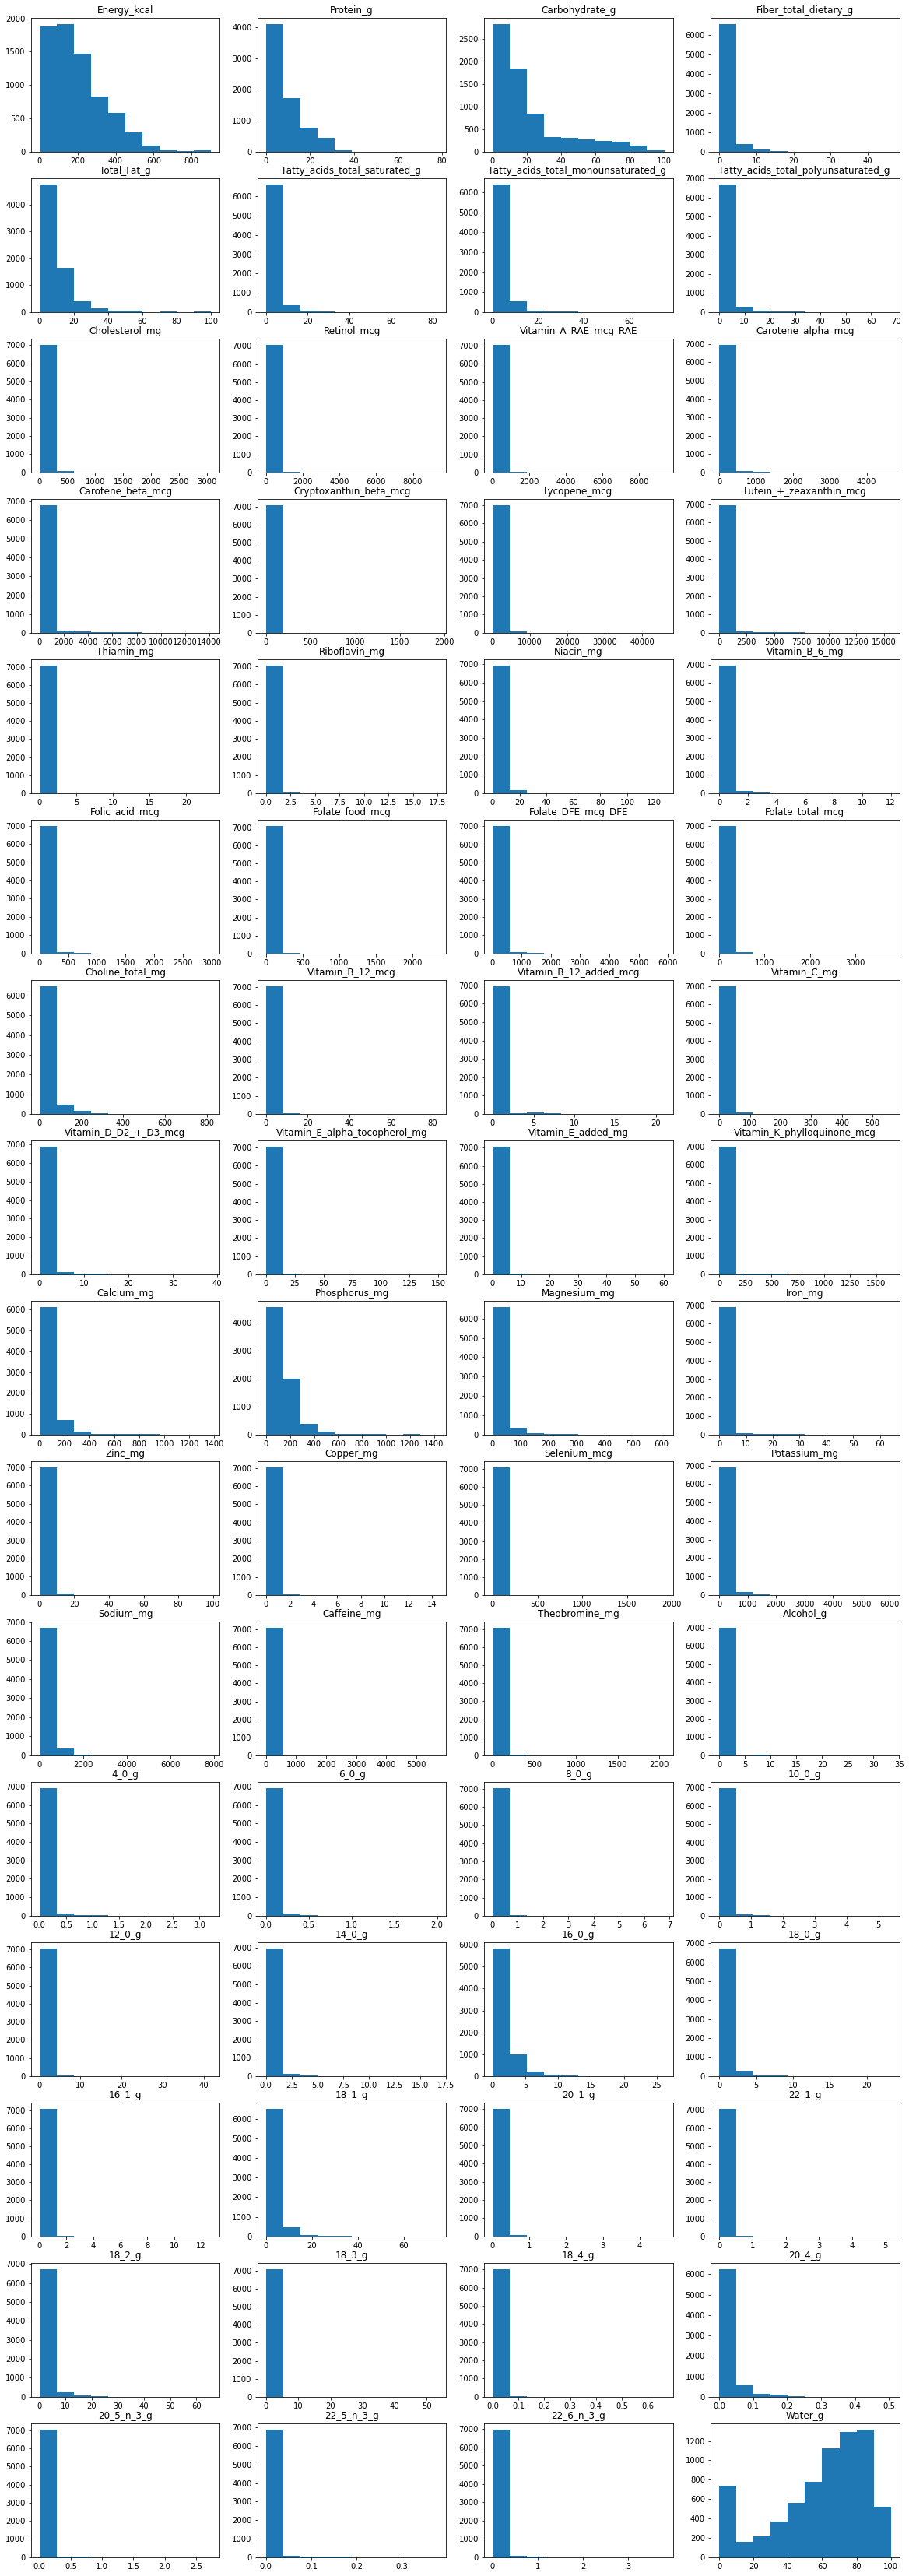

In [9]:
fig, axes = plt.subplots(nrows=16, ncols=4, figsize=(20,60))
for n in range(len(X.columns)):
    row=(n)//4
    col=(n)%4
    ax=axes[row][col]
    x=X.iloc[:,n]
    ax.hist(x)
    ax.set_title(X.columns.values[n])
plt.show()

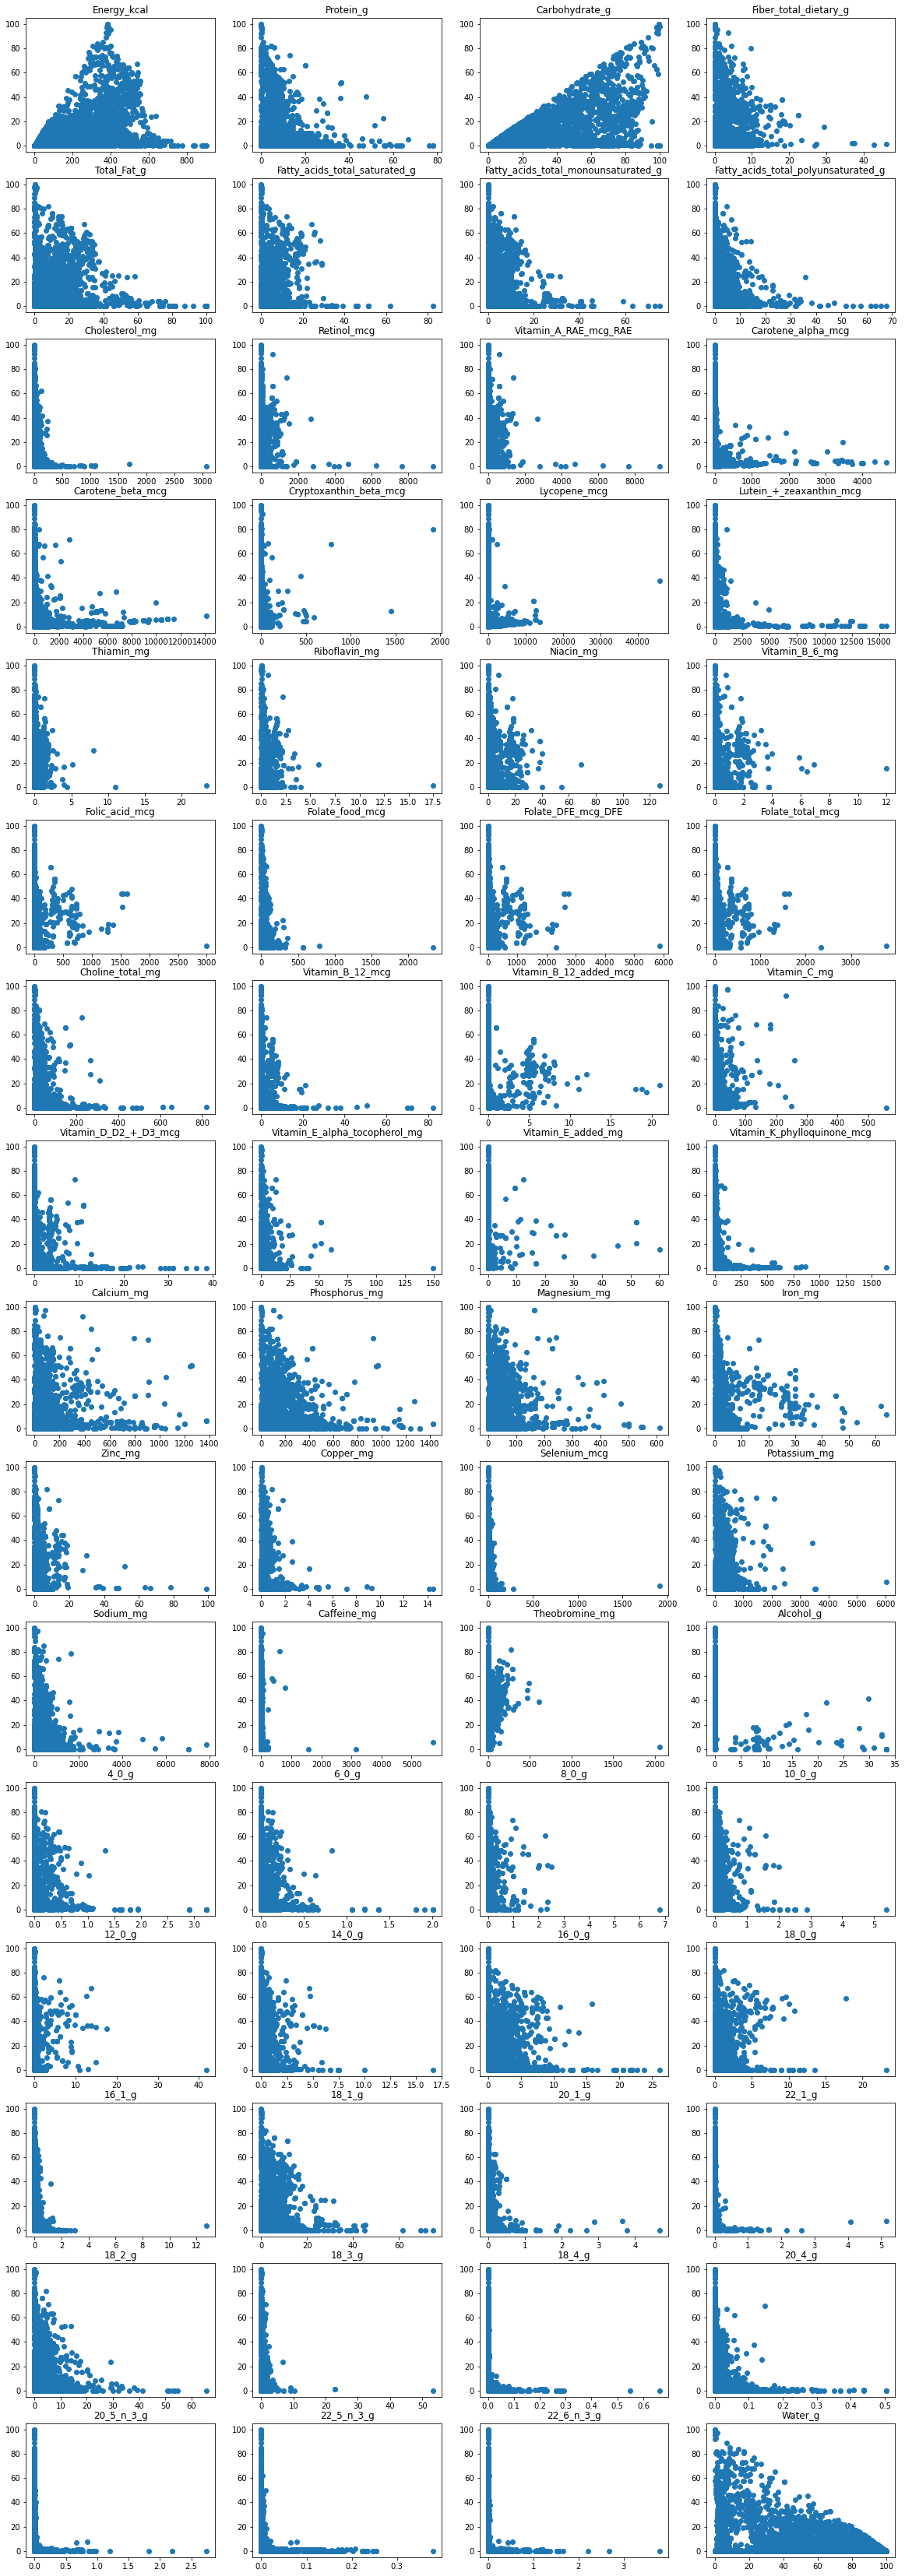

In [11]:
fig, axes = plt.subplots(nrows=16, ncols=4, figsize=(20,60))
for n, column in enumerate(X.columns):
    row=(n)//4
    col=n%4
    ax=axes[row][col]
    x=X[column]
    y=df['Sugars_total_g']
    ax.scatter(x, y)
    ax.set_title(X.columns.values[n])
plt.show()

## OLS regression

In [12]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)
train_df = pd.concat([X_train, y_train], axis=1) 
test_df = pd.concat([X_test, y_test], axis=1)

print('X_train: ', X_train.shape, '\nX_test: ', X_test.shape)

X_train:  (5312, 64) 
X_test:  (1771, 64)


In [174]:
def run_model(y,X):
    X_constant = sm.add_constant(X)
    model = sm.OLS(y,X_constant)
    results = model.fit()
    summary = results.summary()
    print(summary)
    return model

In [183]:
def find_high_p_values(model):
    results = model.fit()
    summary = results.summary()
    p_table = summary.tables[1]
    p_table_df = pd.DataFrame(p_table.data)
    p_table_df.columns=['column','coef','std err','t','P>|t|','0.025','0.975']
    p_table_df.drop(labels=0,axis=0,inplace=True)
    p_table_df.set_index('column',inplace=True)
    p_table_df['P>|t|'] = p_table_df['P>|t|'].astype(float)
    p_table_df['pass']=p_table_df['P>|t|'].map(lambda x: x<=.05)
    drop_list=list(p_table_df[p_table_df['pass']==False].index)
    print(p_table_df[p_table_df['pass']==False]['P>|t|'])
    return drop_list

In [176]:
def drop_high_p_values(train, test, drop_list):
    train_dropped = train.drop(columns = drop_list)
    test_dropped = test.drop(columns = drop_list)
    return train_dropped, test_dropped

In [177]:
model1 = run_model(y_train, X_train)

                            OLS Regression Results                            
Dep. Variable:         Sugars_total_g   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     144.3
Date:                Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:49:07   Log-Likelihood:                -18318.
No. Observations:                5312   AIC:                         3.677e+04
Df Residuals:                    5247   BIC:                         3.719e+04
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [184]:
model1_drop_list = find_high_p_values(model1)

column
Fatty_acids_total_monounsaturated_g    0.256
Retinol_mcg                            0.916
Vitamin_A_RAE_mcg_RAE                  0.916
Carotene_alpha_mcg                     0.878
Carotene_beta_mcg                      0.912
Cryptoxanthin_beta_mcg                 0.267
Folic_acid_mcg                         0.568
Folate_DFE_mcg_DFE                     0.884
Folate_total_mcg                       0.530
Vitamin_B_12_mcg                       0.779
Vitamin_E_alpha_tocopherol_mg          0.177
Vitamin_E_added_mg                     0.097
Vitamin_K_phylloquinone_mcg            0.419
Copper_mg                              0.573
Sodium_mg                              0.710
6_0_g                                  0.138
8_0_g                                  0.966
10_0_g                                 0.335
12_0_g                                 0.313
18_0_g                                 0.372
16_1_g                                 0.776
18_1_g                                 0.406
20_

In [186]:
X_train2, X_test2 = drop_high_p_values(X_train, X_test, model1_drop_list)
model2 = run_model(y_train, X_train2)

                            OLS Regression Results                            
Dep. Variable:         Sugars_total_g   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     246.2
Date:                Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:51:39   Log-Likelihood:                -18350.
No. Observations:                5312   AIC:                         3.678e+04
Df Residuals:                    5274   BIC:                         3.703e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [187]:
model2_drop_list = find_high_p_values(model2)

column
Lycopene_mcg    0.063
4_0_g           0.318
20_4_g          0.131
Name: P>|t|, dtype: float64


In [189]:
X_train3, X_test3 = drop_high_p_values(X_train2, X_test2, model2_drop_list)
model3 = run_model(y_train, X_train3)

                            OLS Regression Results                            
Dep. Variable:         Sugars_total_g   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     267.5
Date:                Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:53:12   Log-Likelihood:                -18353.
No. Observations:                5312   AIC:                         3.678e+04
Df Residuals:                    5277   BIC:                         3.701e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [190]:
model3_drop_list = find_high_p_values(model3)

column
Fatty_acids_total_polyunsaturated_g    0.109
18_2_g                                 0.143
18_3_g                                 0.081
Name: P>|t|, dtype: float64


In [191]:
X_train4, X_test4 = drop_high_p_values(X_train3, X_test3, model3_drop_list)
model4 = run_model(y_train, X_train4)

                            OLS Regression Results                            
Dep. Variable:         Sugars_total_g   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     292.1
Date:                Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:55:02   Log-Likelihood:                -18362.
No. Observations:                5312   AIC:                         3.679e+04
Df Residuals:                    5280   BIC:                         3.700e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [192]:
model4_drop_list = find_high_p_values(model4)

Series([], Name: P>|t|, dtype: float64)


### Checking multicollinearity

In [193]:
vif = [variance_inflation_factor(X_train4.values, i) for i in range(X_train4.shape[1])]
vif_list=list(zip(X_train4.columns, vif))

In [194]:
vif_list

[('Energy_kcal', 859.7988076117255),
 ('Protein_g', 47.20958233429588),
 ('Carbohydrate_g', 214.09047709568986),
 ('Fiber_total_dietary_g', 3.765667842843655),
 ('Total_Fat_g', 231.59119277749713),
 ('Fatty_acids_total_saturated_g', 53.10568426020444),
 ('Cholesterol_mg', 3.8005310784743322),
 ('Lutein_+_zeaxanthin_mcg', 1.2337451382639704),
 ('Thiamin_mg', 3.665946511931962),
 ('Riboflavin_mg', 5.471209581812005),
 ('Niacin_mg', 6.7886794031170545),
 ('Vitamin_B_6_mg', 4.93726732068063),
 ('Folate_food_mcg', 2.1418157796795896),
 ('Choline_total_mg', 8.039848995975463),
 ('Vitamin_B_12_added_mcg', 3.9236636668802225),
 ('Vitamin_C_mg', 1.3817681544624052),
 ('Vitamin_D_D2_+_D3_mcg', 1.6713510566140073),
 ('Calcium_mg', 2.8257453057758872),
 ('Phosphorus_mg', 10.257351727638364),
 ('Magnesium_mg', 4.723520668561436),
 ('Iron_mg', 3.3247490979982626),
 ('Zinc_mg', 1.6410185763169405),
 ('Selenium_mcg', 1.471035117727491),
 ('Potassium_mg', 5.1948246413511745),
 ('Caffeine_mg', 1.4203466

In [195]:
vif_cols = X_train4.columns
X_train_vif = X_train4
X_test_vif = X_test4

In [196]:
maxvif = max(vif)

while maxvif > 5:
    print("Max VIF value is ", maxvif)
    drop_index = vif.index(maxvif)
    print("For Independent variable", vif_cols[drop_index])
    print("Deleting", vif_cols[drop_index])
    vif_cols = vif_cols.delete(drop_index)
    X_train_vif = X_train_vif[vif_cols]
    X_test_vif = X_test_vif[vif_cols]
    vif = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
    maxvif = max(vif)   

Max VIF value is  859.7988076117255
For Independent variable Energy_kcal
Deleting Energy_kcal
Max VIF value is  52.988771572366794
For Independent variable Fatty_acids_total_saturated_g
Deleting Fatty_acids_total_saturated_g
Max VIF value is  10.219729788639533
For Independent variable Phosphorus_mg
Deleting Phosphorus_mg
Max VIF value is  9.05509770758624
For Independent variable 16_0_g
Deleting 16_0_g
Max VIF value is  7.820643706835999
For Independent variable Choline_total_mg
Deleting Choline_total_mg
Max VIF value is  6.345507493404357
For Independent variable Niacin_mg
Deleting Niacin_mg


In [197]:
vif_list=list(zip(X_train_vif.columns, vif)) 
vif_list

[('Protein_g', 4.485182112279188),
 ('Carbohydrate_g', 2.7708598200386656),
 ('Fiber_total_dietary_g', 3.5412721746253393),
 ('Total_Fat_g', 2.4345658734317994),
 ('Cholesterol_mg', 1.733495976671485),
 ('Lutein_+_zeaxanthin_mcg', 1.2024593068866807),
 ('Thiamin_mg', 3.3425287374336103),
 ('Riboflavin_mg', 4.722801751790587),
 ('Vitamin_B_6_mg', 4.675007168798811),
 ('Folate_food_mcg', 2.095680452730483),
 ('Vitamin_B_12_added_mcg', 3.8956241952761186),
 ('Vitamin_C_mg', 1.3557977608220038),
 ('Vitamin_D_D2_+_D3_mcg', 1.5953234850621016),
 ('Calcium_mg', 2.067804169864023),
 ('Magnesium_mg', 3.844852490219676),
 ('Iron_mg', 3.186882403119089),
 ('Zinc_mg', 1.6254899458489915),
 ('Selenium_mcg', 1.4570887068258471),
 ('Potassium_mg', 4.963699928996884),
 ('Caffeine_mg', 1.395409378254036),
 ('Theobromine_mg', 1.1153955648005809),
 ('Alcohol_g', 1.02342413180173),
 ('14_0_g', 1.7258952018498166),
 ('22_6_n_3_g', 1.54570793500707),
 ('Water_g', 2.02555379792809)]

In [198]:
X_train_vif

,Protein_g,Carbohydrate_g,Fiber_total_dietary_g,Total_Fat_g,Cholesterol_mg,Lutein_+_zeaxanthin_mcg,Thiamin_mg,Riboflavin_mg,Vitamin_B_6_mg,Folate_food_mcg,...,Iron_mg,Zinc_mg,Selenium_mcg,Potassium_mg,Caffeine_mg,Theobromine_mg,Alcohol_g,14_0_g,22_6_n_3_g,Water_g
Food_code,,,,,,,,,,,,,,,,,,,,,
24209001,18.86,12.23,0.3,2.82,59,26,0.039,0.201,0.432,7,...,0.73,1.67,21.9,237,0,0,0.0,0.026,0.003,64.54
57124050,5.00,82.40,2.4,6.59,0,3,1.290,1.390,1.660,4,...,27.00,12.50,13.8,126,0,0,0.0,0.003,0.000,2.31
91746200,5.00,72.94,2.5,15.00,13,4,0.082,0.203,0.032,9,...,0.90,1.25,3.3,253,11,126,0.0,0.688,0.000,4.84
25230540,12.50,3.40,0.0,25.10,76,0,0.264,0.179,0.283,4,...,0.64,2.12,25.0,564,0,0,0.0,0.311,0.000,55.50
11710470,2.01,7.22,0.0,3.95,2,0,0.158,0.108,0.072,0,...,1.29,0.87,1.6,102,0,0,0.0,0.204,0.013,86.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26115190,29.98,0.00,0.0,4.66,109,0,0.048,0.046,0.213,11,...,0.44,0.77,64.3,386,0,0,0.0,0.210,0.261,62.87
12350225,2.00,11.88,0.1,12.34,20,10,0.030,0.067,0.026,7,...,0.10,0.29,2.4,125,0,0,0.0,0.422,0.001,72.27
71507020,3.61,17.67,1.2,7.73,22,0,0.087,0.066,0.248,9,...,0.30,0.55,2.8,328,0,0,0.0,0.689,0.000,69.45


### Model again and check p_values

In [199]:
model5 = run_model(y_train, X_train_vif)

                            OLS Regression Results                            
Dep. Variable:         Sugars_total_g   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     322.8
Date:                Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:09:44   Log-Likelihood:                -18552.
No. Observations:                5312   AIC:                         3.716e+04
Df Residuals:                    5286   BIC:                         3.733e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -

In [200]:
model5_drop_list = find_high_p_values(model5)

column
Lutein_+_zeaxanthin_mcg    0.180
Riboflavin_mg              0.082
Vitamin_B_6_mg             0.309
Vitamin_D_D2_+_D3_mcg      0.353
22_6_n_3_g                 0.138
Name: P>|t|, dtype: float64


In [201]:
X_train6, X_test6 = drop_high_p_values(X_train_vif, X_test_vif, model5_drop_list)
model6 = run_model(y_train, X_train6)

                            OLS Regression Results                            
Dep. Variable:         Sugars_total_g   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     402.4
Date:                Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:13:04   Log-Likelihood:                -18558.
No. Observations:                5312   AIC:                         3.716e+04
Df Residuals:                    5291   BIC:                         3.730e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -166

### Evaluating the model

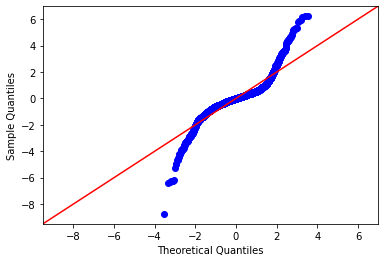

In [203]:
results6 = model6.fit()
fig = sm.graphics.qqplot(results6.resid, dist=stats.norm, line='45', fit=True)


In [206]:
results6.resid

Food_code
24209001     5.990437
57124050    -0.240060
91746200    11.778050
25230540    -0.652251
11710470     2.882783
              ...    
26115190     2.914795
12350225     0.889375
71507020    -7.071019
27450061     2.756571
28520100     6.199962
Length: 5312, dtype: float64

In [220]:
y_train_hat=results6.predict()

In [213]:
y_train

Food_code
24209001     9.97
57124050    26.10
91746200    50.00
25230540     0.00
11710470     7.26
            ...  
26115190     0.00
12350225     6.85
71507020     1.66
27450061     2.70
28520100     0.00
Name: Sugars_total_g, Length: 5312, dtype: float64

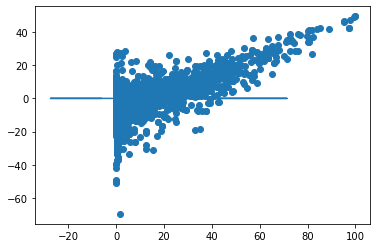

In [219]:
plt.scatter(y_train, results6.resid)
plt.plot(results6.predict(), [0 for i in range(len(X_train6))])

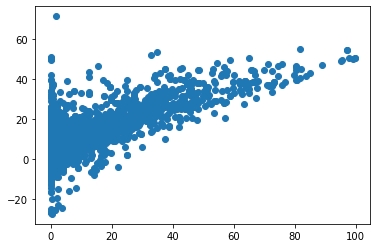

In [221]:
plt.scatter(y_train, y_train_hat)

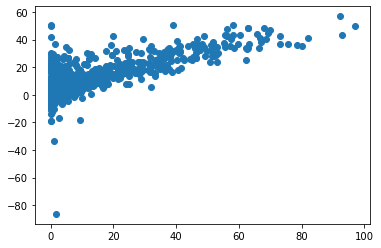

In [222]:
plt.scatter(y_test, yhat)

In [215]:
# evaluation of a model using all input features
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model7 = LinearRegression()
model7.fit(X_train6, y_train)
# evaluate the model
yhat = model7.predict(X_test6)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
rmse= mean_squared_error(y_test, yhat, squared=False)
print('MAE: %.3f' % mae)
print('RMSE: %.3f' % rmse)
print('Coefficient of determination: %.2f' % r2_score(y_test, yhat))
# The coefficients
print('Coefficients: \n', model7.coef_)

MAE: 5.120
RMSE: 8.415
Coefficient of determination: 0.60
Coefficients: 
 [ 1.56462841e+00  2.17566448e+00 -1.58174468e+00  1.70735319e+00
  5.00682427e-03 -3.97552596e+00  1.86958333e-02  1.71819367e+00
  2.81219394e-02  3.42847651e-03  2.71674361e-02 -5.19392382e-01
  1.82941333e-01 -1.29935070e-02  6.47221767e-03 -7.17376868e-03
  4.63930586e-02  1.80384638e+00  9.20328831e-01  1.67832815e+00]


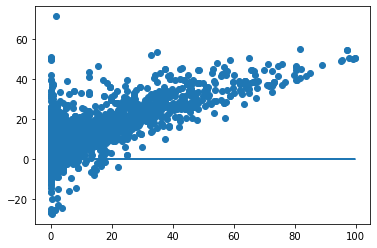

In [218]:
plt.scatter(y_train, model7.predict(X_train6))
plt.plot(y_train, [0 for i in range(len(y_train))])

In [ ]:
plt.scatter(y_test, yhat)
plt.plot(y_test, [0 for i in range(len(y_test))])

### Regression Conclusion

## Rank fruit groups by their sweetness

In [143]:
# These fruit categories are taken from the provided document as it appears to be the same categories used by WW

fruit_categories = ['Apples', 'Bananas', 'Grapes', 'Peaches and nectarines', 'Strawberries', 'Blueberries and other berries',
                    'Citrus fruits', 'Melons', 'Dried fruits', 'Other fruits and fruit salads', 'Pears',
                    'Pineapple', 'Mango and papaya']

In [134]:
# Filter the data based on these categories

fruits = df[df['WWEIA_Category_description'].isin(fruit_categories)]
fruits

,Main_food_description,WWEIA_Category_number,WWEIA_Category_description,Energy_kcal,Protein_g,Carbohydrate_g,Sugars_total_g,Fiber_total_dietary_g,Total_Fat_g,Fatty_acids_total_saturated_g,...,20_1_g,22_1_g,18_2_g,18_3_g,18_4_g,20_4_g,20_5_n_3_g,22_5_n_3_g,22_6_n_3_g,Water_g
Food_code,,,,,,,,,,,,,,,,,,,,,
61100600,"Clementine, raw",6012,Citrus fruits,53,0.81,13.34,10.58,1.8,0.31,0.039,...,0.000,0.000,0.048,0.018,0.0,0.000,0.000,0.000,0.000,85.17
61101010,"Grapefruit, raw",6012,Citrus fruits,42,0.77,10.66,6.89,1.6,0.14,0.021,...,0.000,0.000,0.029,0.008,0.0,0.000,0.000,0.000,0.000,88.06
61101200,"Grapefruit, canned",6012,Citrus fruits,36,0.58,9.15,8.75,0.4,0.10,0.014,...,0.000,0.000,0.019,0.005,0.0,0.000,0.000,0.000,0.000,89.85
61110010,"Kumquat, raw",6012,Citrus fruits,71,1.88,15.90,9.36,6.5,0.86,0.103,...,0.000,0.000,0.124,0.047,0.0,0.000,0.000,0.000,0.000,80.85
61113010,"Lemon, raw",6012,Citrus fruits,29,1.10,9.32,2.50,2.8,0.30,0.039,...,0.000,0.000,0.063,0.026,0.0,0.000,0.000,0.000,0.000,88.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63403010,"Fruit salad, including citrus fruits, with sal...",6018,Other fruits and fruit salads,230,1.97,13.06,8.60,2.1,19.90,2.802,...,0.057,0.004,10.675,1.794,0.0,0.010,0.000,0.000,0.001,64.19
63403020,"Fruit salad, including citrus fruit, with whip...",6018,Other fruits and fruit salads,147,2.29,14.54,9.65,2.3,10.04,3.248,...,0.019,0.000,3.506,0.819,0.0,0.007,0.001,0.002,0.000,72.52
63403030,"Fruit salad, including citrus fruits, with non...",6018,Other fruits and fruit salads,137,2.14,16.60,11.49,2.4,8.04,2.260,...,0.012,0.000,3.531,0.857,0.0,0.000,0.000,0.000,0.000,72.62


In [135]:
# Select just the relevant attributes

fruits = fruits[['Main_food_description','WWEIA_Category_description','Sugars_total_g']]
fruits

,Main_food_description,WWEIA_Category_description,Sugars_total_g
Food_code,,,
61100600,"Clementine, raw",Citrus fruits,10.58
61101010,"Grapefruit, raw",Citrus fruits,6.89
61101200,"Grapefruit, canned",Citrus fruits,8.75
61110010,"Kumquat, raw",Citrus fruits,9.36
61113010,"Lemon, raw",Citrus fruits,2.50
...,...,...,...
63403010,"Fruit salad, including citrus fruits, with sal...",Other fruits and fruit salads,8.60
63403020,"Fruit salad, including citrus fruit, with whip...",Other fruits and fruit salads,9.65
63403030,"Fruit salad, including citrus fruits, with non...",Other fruits and fruit salads,11.49


In [136]:
# Group by gategory and aggregate on the mean Sugar value

grouped_fruits = fruits.groupby('WWEIA_Category_description').mean().sort_values('Sugars_total_g', ascending=False)
grouped_fruits

,Sugars_total_g
WWEIA_Category_description,
Dried fruits,59.579474
Bananas,16.585000
Grapes,15.480000
Apples,15.154286
Other fruits and fruit salads,12.940976
Mango and papaya,12.248000
Pineapple,11.782000
Pears,10.448000
Strawberries,10.426667


In [137]:
# It doesn't seem right to me to penalize apples as having high sugar content when we are including candied apples
# Also for other fruit types we are including canned and sweetened varieties

fruits[fruits["WWEIA_Category_description"] == 'Apples']

,Main_food_description,WWEIA_Category_description,Sugars_total_g
Food_code,,,
63101000,"Apple, raw",Apples,10.39
63101110,"Applesauce, regular",Apples,14.67
63101120,"Applesauce, unsweetened",Apples,9.39
63101150,"Applesauce, flavored",Apples,14.67
63101210,Apple pie filling,Apples,13.80
63101310,"Apple, baked",Apples,18.99
63401060,"Apple, candied",Apples,24.17


In [141]:
# I will create another grouping just on raw fruits
# Need the space before 'raw' or all versions of strawberries will show up

raw_fruits = fruits[fruits["Main_food_description"].str.contains(' raw')] 

raw_fruits

,Main_food_description,WWEIA_Category_description,Sugars_total_g
Food_code,,,
61100600,"Clementine, raw",Citrus fruits,10.58
61101010,"Grapefruit, raw",Citrus fruits,6.89
61110010,"Kumquat, raw",Citrus fruits,9.36
61113010,"Lemon, raw",Citrus fruits,2.50
61116010,"Lime, raw",Citrus fruits,1.69
61119010,"Orange, raw",Citrus fruits,9.35
61125010,"Tangerine, raw",Citrus fruits,10.58
63101000,"Apple, raw",Apples,10.39
63103010,"Apricot, raw",Other fruits and fruit salads,9.24


In [142]:
grouped_raw_fruits = raw_fruits.groupby('WWEIA_Category_description').mean().sort_values('Sugars_total_g', ascending=False)
grouped_raw_fruits

,Sugars_total_g
WWEIA_Category_description,
Grapes,15.480000
Bananas,12.230000
Mango and papaya,10.740000
Other fruits and fruit salads,10.540000
Apples,10.390000
Pineapple,9.850000
Pears,8.400000
Peaches and nectarines,8.140000
Citrus fruits,7.278571


### Fruit Ranking - Conclusion

I am pleased with the ranking of raw fruits, grouped by category, and aggregated by their mean Sugar value.  But this is a case of needing to understand the business context of how the data will be used.  If an aggregation over all foods in each fruit category is desired, then the initial grouped fruits ranking would be more appropriate.

It is also interesting to note that the sugar values are per 100g edible portion of each food so this analysis doesn't really take into account serving size except to assume it is the same 100g for each product.  Lemons and limes are the lowest sugar fruits on the list so their inclusion brings down the average sugar count for all citrus fruits, even though I presume no one sits down and consumes 100g of limes.  Just a little food for thought...